In [38]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline 

In [39]:
Dat = pd.read_excel('./PoliticianAssembly/Attendance_of_the_Members_of_Lok_Sabha_15_Session_5.xls')
Dat.head()

,S.No.,Division/Seat No.,Name of Member,Lok Sabha,Session,State,Constituency,Total Sittings,No. of days member signed the register
0,1,3,Smt. Sonia Gandhi ...,15,5,Uttar Pradesh ...,Rae Barelii,26,9
1,2,11,Shri Ajit Singh ...,15,5,Uttar Pradesh ...,Baghpat,26,M
2,3,14,Shri Paban Singh Ghatowar ...,15,5,Assam ...,Dibrugarh,26,M
3,4,24,Shri V. Kishore Chandra S. Deo ...,15,5,Andhra Pradesh ...,Araku,26,M
4,5,25,Shri Beni Prasad Verma ...,15,5,Uttar Pradesh ...,Gonda,26,M


In [40]:
#Deleting all rows where the members didn't sign in 
I = Dat['No. of days member signed the register'] != 'M' 
Dat = Dat[I]
Dat.head()

,S.No.,Division/Seat No.,Name of Member,Lok Sabha,Session,State,Constituency,Total Sittings,No. of days member signed the register
0,1,3,Smt. Sonia Gandhi ...,15,5,Uttar Pradesh ...,Rae Barelii,26,9
17,18,61,Shri Rahul Gandhi ...,15,5,Uttar Pradesh ...,Amethi,26,11
28,29,72,Shri Sandeep Dikshit ...,15,5,Delhi ...,East Delhi,26,24
29,30,73,Shri J.M. Aaron Rashid ...,15,5,Tamil Nadu ...,Theni,26,8
30,31,75,Shri Naveen Jindal ...,15,5,Haryana ...,Kurukshetra,26,22


In [41]:
from sklearn.preprocessing import LabelEncoder
St = LabelEncoder()
St.fit(Dat['State'])
Dat['State'] = St.transform(Dat['State'])

NoDays = LabelEncoder()
NoDays.fit(Dat['No. of days member signed the register'])
Dat['No. of days member signed the register'] = NoDays.transform(Dat['No. of days member signed the register'])

In [42]:
#for each state get the median of the attendance percentage for the politicians 
Dat2 = Dat.groupby(['State'],as_index=False)['No. of days member signed the register'].mean()
Dat2['State'] = St.inverse_transform(Dat2['State'])


In [43]:
#Get mean attendance by state 
Dat2

,State,No. of days member signed the register
0,Andaman and Nicobar Islands ...,17.000000
1,Andhra Pradesh ...,16.062500
2,Arunachal Pradesh ...,18.000000
3,Assam ...,17.454545
4,Bihar ...,18.131579
5,Chhattisgarh ...,17.500000
6,Dadra and Nagar Haveli ...,3.000000
7,Daman and Diu ...,9.000000
8,Delhi ...,21.750000
9,Goa ...,22.000000


In [44]:
#Sort states by mean attendance 
Dat2.sort(columns='No. of days member signed the register')

C:\Users\Sumit\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,State,No. of days member signed the register
6,Dadra and Nagar Haveli ...,3.000000
7,Daman and Diu ...,9.000000
15,Karnataka ...,15.160000
1,Andhra Pradesh ...,16.062500
31,West Bengal ...,16.242424
11,Haryana ...,16.500000
27,Tamil Nadu ...,16.612903
19,Maharashtra ...,16.820513
0,Andaman and Nicobar Islands ...,17.000000
23,Orissa ...,17.150000


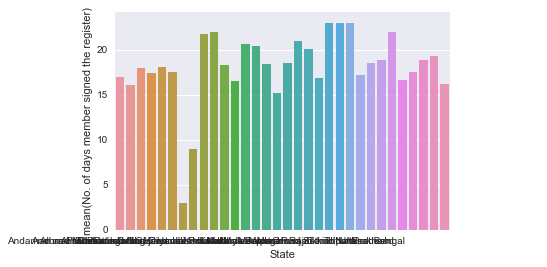

In [49]:
#Graphic visualization of the same data
sns.barplot(x = 'State', y = 'No. of days member signed the register', data = Dat2)

In [50]:
#Get the top 3 politicians in terms of attendance 
Dat_temp = Dat.sort(columns = 'No. of days member signed the register', ascending= False)
Dat_temp.head(3)


C:\Users\Sumit\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,S.No.,Division/Seat No.,Name of Member,Lok Sabha,Session,State,Constituency,Total Sittings,No. of days member signed the register
389,390,457,Shri Lal Krishna Advani ...,15,5,10,Gandhinagar,26,23
99,100,155,Shri Eknath Gaikwad ...,15,5,19,Mumbai-South-Central,26,23
113,114,170,Shri Prabhakar Ponnam ...,15,5,1,Karimnagar,26,23


In [51]:
#Get the bottom 3 politicians in terms of attendance 
Dat_temp = Dat.sort(columns = 'No. of days member signed the register', ascending= True)
Dat_temp.head(3)


C:\Users\Sumit\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,S.No.,Division/Seat No.,Name of Member,Lok Sabha,Session,State,Constituency,Total Sittings,No. of days member signed the register
310,311,375,Shri K. Chandrasekhar Rao ...,15,5,1,Mahabubnagar,26,0
332,333,398,Ms. M. Vijaya Shanthi ...,15,5,1,Medak,26,0
193,194,256,Shri Thol Thirumaavalavan,15,5,27,Chidambaram,26,1
